# # Online Fraud Detection prediction model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('../input/paysim1/PS_20174392719_1491204439457_log.csv')

In [3]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [4]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [6]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

Text(0.5, 1.0, 'Transaction types')

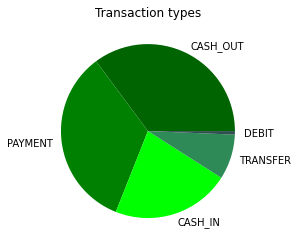

In [7]:
colors = ['#006400','#008000','#00FF00','#2E8B57','#2F4F4F']
plt.pie(data['type'].value_counts().values,labels = data['type'].value_counts().index,
        colors = colors)
plt.title('Transaction types')

In [8]:
correlation = data.corr()

<AxesSubplot:>

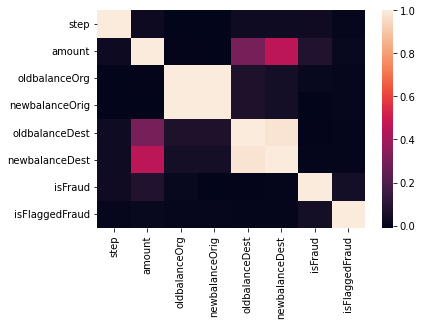

In [9]:
sns.heatmap(data.corr())

In [10]:
correlation['isFraud'].reset_index().sort_values('isFraud',ascending = False)

,index,isFraud
6,isFraud,1.000000
1,amount,0.076688
7,isFlaggedFraud,0.044109
0,step,0.031578
2,oldbalanceOrg,0.010154
5,newbalanceDest,0.000535
4,oldbalanceDest,-0.005885
3,newbalanceOrig,-0.008148


In [11]:
data['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [12]:
data['type'].value_counts()

CASH_OUT    2237500
PAYMENT     2151495
CASH_IN     1399284
TRANSFER     532909
DEBIT         41432
Name: type, dtype: int64

In [13]:
data['type'] = data['type'].map({'CASH_OUT':1,'PAYMENT':2,'CASH_IN':3,'TRANSFER':4,'DEBIT':5})

In [14]:
x = data[['type','amount','oldbalanceOrg','newbalanceOrig']]
x

,type,amount,oldbalanceOrg,newbalanceOrig
0,2,9839.64,170136.00,160296.36
1,2,1864.28,21249.00,19384.72
2,4,181.00,181.00,0.00
3,1,181.00,181.00,0.00
4,2,11668.14,41554.00,29885.86
...,...,...,...,...
6362615,1,339682.13,339682.13,0.00
6362616,4,6311409.28,6311409.28,0.00
6362617,1,6311409.28,6311409.28,0.00
6362618,4,850002.52,850002.52,0.00


In [15]:
y = data['isFraud']
y

0          0
1          0
2          1
3          1
4          0
          ..
6362615    1
6362616    1
6362617    1
6362618    1
6362619    1
Name: isFraud, Length: 6362620, dtype: int64

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20)

In [18]:
xtrain.shape

(5090096, 4)

In [19]:
xtest.shape

(1272524, 4)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
tree = DecisionTreeClassifier()

In [22]:
model = tree.fit(xtrain,ytrain)

In [23]:
model.score(xtest,ytest)

0.9996880216011643

In [24]:
xtest.head(1)

,type,amount,oldbalanceOrg,newbalanceOrig
889080,1,200686.13,12474.0,0.0


In [25]:
ytest.head(1)

889080    0
Name: isFraud, dtype: int64

In [26]:
model.predict([[3,251111.82,2679291.55,2930403.37]])

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0])